# Web Scraping

* The internet is an absolutely massive source of data. Unfortunately, the vast majority if it isn’t available in 
* conveniently organized CSV files for download and analysis.
* If we  want to capture data from many websites, - answer is  web scraping.

### Web Scraping - Automatic Gathering of Information from the Web
* Writing some code that will fetch some information from the Web
* In todays session we’re going to cover how to do web scraping with Python from scratch, 

### Why would you scrape the Web
* Why does someone have to collect such large data from websites?
* To collect data from online shopping websites and use it to compare the prices of products.
* To collect email ID and then send bulk emails
* To collect data from Social Media websites such as Twitter to find out what’s trending.
* To collect a large set of data (Statistics, General Information, Temperature, Weather etc.) from websites, which can be  analyzed and used for  R&D.
* Pick up song lyrics from a specific Album but you dont want clicking around and doing copy paste
* Better way is to automate this extraction process and pull out the informatiom from the HTML script
* Automated Job Search: Collect information about job openings and interviews 

### Objective:
* The data on the websites are unstructured. Web scraping helps collect these unstructured data and store it in a structured form.
* Case Study: Automatic Gathering of Information about Laptops from "flipkart"

### Is it legal? 
* Some websites explicitly allow web scraping. Others explicitly forbid it. 
* Many websites don’t offer any clear guidance one way or the other.
* Before scraping any website, we should look for a terms and conditions page to see if there are explicit rules about scraping. If there are, we should follow them. If there are not, then it becomes more of a judgement call.

### Guidelines
* Remember, though, that web scraping consumes server resources for the host website. If we’re just scraping one page once,
* that isn’t going to cause a problem. But if our code is scraping 1,000 pages once every ten minutes, 
* that could quickly get expensive for the website owner.

* it’s also a good idea to follow these best practices:

* Never scrape more frequently than you need to.
* Consider caching the content you scrape so that it’s only downloaded once as you work on the code you’re using to filter
* and analyze it, rather than re-downloading every time you run your code
* Consider building pauses into your code using functions like time.sleep() to keep from overwhelming servers with too many
*requests in too short a timespan.

###  How to do Web Scraping?
#### To extract data using web scraping with python, you need to follow these basic steps:

* Find the URL that you want to scrape
* Inspecting the Page
* Find the data you want to extract
* Write the code
* Run the code and extract the data
* Store the data in the required format 

In [9]:
# Step1:  Find the URL that you want to scrape
# Inspect the  Flipkart website to extract the Price, Name, and Rating of Laptops. 
# "https://www.flipkart.com/search?q={0}&page={1}"

In [ ]:
#Step 2: Inspect the page
# To inspect the page, just right click on the element and click on “Inspect”. You will see a “Browser Inspector Box” open.

In [ ]:
#Step 3: Find the data you want to extract
# Here we are interested in the name, price, ratings and Specifications of several Laptops
# Specifications include cpu, ram, os, hd, display
# So, we inspect the page to see, under which tag the data we want to scrape is nested.
# we see that the Price, Name, and Rating which is in the “div” tag respectively

In [ ]:
# Step 4: How to write code  to extract this information
#First, you’ll want to get the site’s HTML code into your Python script so that you can interact with it.
#page = requests.get(URL)
#This code performs an HTTP request to the given URL.
# It retrieves the HTML data that the server sends back and  stores that data in a Python object.
# For this task, you’ll use Python’s requests library. 
# Type the following in your terminal to install it: $ pip3 install requests

In [ ]:
# Pick the relevant data
# You can parse an HTML response with Beautiful Soup and begin to pick out the relevant data.
# The data we want to extract is nested in <div> tags. So, I will find the div tags with those respective class-names, 
# extract the data and store the data in a variable. Refer the code below:

In [ ]:
# Step 5 and 6: Run the code and store the data in a required format either a csv file or a dataframe

In [2]:
#To install fake-useragent. Then only we can import UserAgent

pip install fake-useragent

  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13489 sha256=1d089bf0b45647b7c03fa7deda9d042555c2d70ef8f5ceb72c915193be7f023d
  Stored in directory: c:\users\91730\appdata\local\pip\cache\wheels\a0\b8\b7\8c942b2c5be5158b874a88195116b05ad124bac795f6665e65
Successfully built fake-useragent
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import Required Libraries
import requests      #send request to HTML page
import bs4
from bs4 import BeautifulSoup     #python library for extracting data

from fake_useragent import UserAgent

import pandas as pd                       #Further Analysis of the extracted Data
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Initialization of the lists to store the extracted data
# The data that we extract is unstructured data. So we’ll create empty lists to store them in a structured form,
count=0                  # Intialize search row count
products=[]              #List to store name of the product
prices=[]                #List to store price of the product
ratings=[]               #List to store rating of the product
#specifications = []     #List to store specifications of the product
cpu = []                 #List to store CPU specifications of the product
ram = []                 #List to store RAM specifications of the product
os = []                  #List to store OS specifications of the product
hd = []                  #List to store HDD specifications of the product
display = []             #List to store Display specifications of the product
df = pd.DataFrame()      #Initialize Dataframe

In [3]:
# Creating an User agent  pip insatll fake-useragent
# A User agent acts as a bridge between the user and the internet . 
# It gives the webserver necessary information about your browser, software, device type and etc.
# According to this information the web servers can display different webpages for you
# The web server uses this information to adapt the content to specific web browsers and different OS
# https://pypi.org/project/fake-useragent/    # read here
 
user_agent = UserAgent() # Dummy User Agent
print(user_agent)

In [4]:
# Set the product name. we are searching for laptops
# The extracted data will be related to that product.\ # Search for Laptops
product_name = 'laptop'

In [5]:
# Find Elements by ID
#To extract data from multiple pages of the product listing we’re going to use a for loop.
# The range will specify the number of pages to be extracted

url = "https://www.flipkart.com/search?q={0}&page={1}" 
print( url.format(product_name,1))          #run and check this  

https://www.flipkart.com/search?q=laptop&page=1


In [6]:
# Limiting search to 3 pages due to multiple redirection issues for higher number of pages

for i in range(1,3): 
    url = "https://www.flipkart.com/search?q={0}&page={1}" # Scrape data from Flipkart.com
    url = url.format(product_name,i)
    #print(url)

    ## Getting the reponse from the page using get method of requests module. If you get a response of 200, 
    #then we are able to do webscraping
    page = requests.get(url, headers ={"User_agent": user_agent.chrome})
    #print(page)
    
    ## Storing the content of the page in a variable
    html = page.content
    #print(html)
    
    # To Extract data from html file --- Creating BeautifulSoup object
    page_soup = bs4.BeautifulSoup(html, "html.parser")
    #print(page_soup.prettify())     #Will show as a clean nested html file
    #it gives the visual representation of the parse tree created from the raw HTML content.
    
    #Iterate over page_soup.find_all('p')    # this will iterate over all paras
    #print(page_soup.find_all('p')[0].get_text())
    
    ## Decoding the tags
    #('a',{'class':'_1fQZEK'})
    
    for containers in page_soup.findAll('a',{'class':'_1fQZEK'}):    # for loop iterating over list
        name = containers.find('div', attrs={'class':'_4rR01T'})
        price = containers.find('div', attrs={'class':'_30jeq3 _1_WHN1'})
        rating = containers.find('div', attrs={'class':'_3LWZlK'})
        specification = containers.find('div', attrs={'class':'fMghEO'})
        
        ## Splitting integrated specification into individual CPU, RAM, OS, HDD and Display specifications
        for col in specification:
            col = col.find_all('li', attrs={'class':'rgWa7D'})
            cput =col[0].text  #CPU info
            ramt = col[1].text  #RAM info
            ost = col[2].text  #OS info
            hdt = col[3].text  #HDD info
            displayt = col[4].text  #Display info
            
        products.append(name.text)  # Add product name to list
        
        prices.append(price.text)  # Add price to list
        
        #specifications.append(specification.text) if type(specification) == bs4.element.Tag  else specifications.append('NaN')
        
        cpu.append(cput)  # Add CPU specifications to list
        
        ram.append(ramt)  # Add RAM specifications to list
        
        os.append(ost)  # Add OS specifications to list
        
        hd.append(hdt) # Add HDD specifications to list
        
        display.append(displayt) # Add Display specifications to list
        
        ratings.append(rating.text) if type(rating) == bs4.element.Tag  else ratings.append('NaN') # Add Rating to list
        
        count = count + 1 # Increment row count
    
    ## Create a dataframe with structured data from all searched rows
    df = pd.DataFrame({'Product Name':products,'CPU':cpu,'RAM':ram,'OS':os,"HD Capacity":hd,'Display':display,'Price':prices,'Rating':ratings,})

print('No. of rows searched',count)

No. of rows searched 48


In [7]:
df.shape

(48, 8)

In [8]:
df.head()

,Product Name,CPU,RAM,OS,HD Capacity,Display,Price,Rating
0,Mi Notebook 14 Core i5 10th Gen - (8 GB/512 GB...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,"₹44,999",4.3
1,APPLE MacBook Air Core i5 5th Gen - (8 GB/128 ...,Intel Core i5 Processor (5th Gen),8 GB DDR3 RAM,64 bit Mac OS Operating System,128 GB SSD,33.78 cm (13.3 inch) Display,"₹67,990",4.7
2,acer Aspire 7 Ryzen 5 Hexa Core 5500U - (8 GB/...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,"₹54,990",4.5
3,HP 14 Core i5 10th Gen - (8 GB/512 GB SSD/Wind...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,"₹47,990",4.3
4,HP 14s Core i3 10th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,"₹36,990",4.2


In [41]:
df.tail()

,Product Name,CPU,RAM,OS,HD Capacity,Display,Price,Rating
43,Asus Core i3 10th Gen - (4 GB/512 GB SSD/Windo...,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,"₹36,990",4.3
44,Dell Inspiron 3505 Athlon Dual Core 3150U - (4...,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,"₹29,650",4.8
45,Asus ROG Strix G15 (2020) Core i7 10th Gen - (...,Intel Core i7 Processor (10th Gen),16 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,"₹82,990",4.6
46,Asus VivoBook 14 Core i5 10th Gen - (8 GB/1 TB...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD|256 GB SSD,35.56 cm (14 inch) Display,"₹55,990",4.3
47,Dell INSPIRON Core i3 10th Gen - (8 GB/1 TB HD...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,"₹40,690",NaN


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product Name  48 non-null     object
 1   CPU           48 non-null     object
 2   RAM           48 non-null     object
 3   OS            48 non-null     object
 4   HD Capacity   48 non-null     object
 5   Display       48 non-null     object
 6   Price         48 non-null     object
 7   Rating        48 non-null     object
dtypes: object(8)
memory usage: 3.1+ KB


In [45]:
df.isnull().sum()  #Check for Null values

Product Name    0
CPU             0
RAM             0
OS              0
HD Capacity     0
Display         0
Price           0
Rating          0
dtype: int64

In [50]:
df.isna().sum()  #Check for NaN values

Product Name    0
CPU             0
RAM             0
OS              0
HD Capacity     0
Display         0
Price           0
Rating          0
dtype: int64

In [48]:
df.describe()

,Product Name,CPU,RAM,OS,HD Capacity,Display,Price,Rating
count,48,48,48,48,48,48,48,48
unique,48,15,5,4,5,5,38,11
top,Asus VivoBook 14 Ryzen 5 Quad Core 3500U - (8 ...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,"₹51,990",4.3
freq,1,12,25,44,15,23,3,10


In [49]:
df.dtypes

Product Name    object
CPU             object
RAM             object
OS              object
HD Capacity     object
Display         object
Price           object
Rating          object
dtype: object

In [51]:
#Identify rows with wrongly positioned data i.e. a particular data misplaced under a different column

a = df[(~df['CPU'].str.contains('Processor'))|(~df['RAM'].str.contains('RAM'))|(~df['OS'].str.contains('Operating'))|(~df['HD Capacity'].str.contains('GB|TB'))].index
a  #Save index information of such rows

Int64Index([], dtype='int64')

In [52]:
df = df.drop(a, axis=0)  #Drop rows with wrongly positioned data elements 

In [53]:
df.shape

(48, 8)

In [54]:
df.head()

,Product Name,CPU,RAM,OS,HD Capacity,Display,Price,Rating
0,HP 15s Celeron Dual Core - (4 GB/1 TB HDD/Wind...,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,"₹23,990",4
1,HP Pavilion Gaming Ryzen 5 Quad Core 3550H - (...,AMD Ryzen 5 Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,"₹52,990",4.2
2,Lenovo Ideapad Slim 3i Core i3 10th Gen - (8 G...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,"₹35,990",4.5
3,MSI Modern 14 Ryzen 5 Hexa Core 4500U - (8 GB/...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,"₹51,990",4.6
4,Asus Core i3 10th Gen - (4 GB/512 GB SSD/Windo...,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,"₹36,990",4.3


In [55]:
# Format Price column to remove ₹ and delimiter ',' used for the thousandth place 

df['Price'] = df['Price'].str.lstrip('₹')
df['Price'] = df['Price'].replace({',' : ''}, regex=True)

In [56]:
df.head() # Check if formatting is correct

,Product Name,CPU,RAM,OS,HD Capacity,Display,Price,Rating
0,HP 15s Celeron Dual Core - (4 GB/1 TB HDD/Wind...,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,23990,4
1,HP Pavilion Gaming Ryzen 5 Quad Core 3550H - (...,AMD Ryzen 5 Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,52990,4.2
2,Lenovo Ideapad Slim 3i Core i3 10th Gen - (8 G...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,35990,4.5
3,MSI Modern 14 Ryzen 5 Hexa Core 4500U - (8 GB/...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,51990,4.6
4,Asus Core i3 10th Gen - (4 GB/512 GB SSD/Windo...,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,36990,4.3


In [58]:
df.dtypes

Product Name    object
CPU             object
RAM             object
OS              object
HD Capacity     object
Display         object
Price           object
Rating          object
dtype: object

In [60]:
# Convert numeric columns in string format to float for mathematical and graphic operations
#for i in range(6,8,1):
    #df.iloc[:,i]= df.iloc[:,i].astype(float)   #for loop is used if many values are to be changed
    
    
df.iloc[:,6]= df.iloc[:,6].astype(float)
df.iloc[:,7]= df.iloc[:,7].astype(float)

In [61]:
df.dtypes

Product Name     object
CPU              object
RAM              object
OS               object
HD Capacity      object
Display          object
Price           float64
Rating          float64
dtype: object

In [62]:
df.head()

,Product Name,CPU,RAM,OS,HD Capacity,Display,Price,Rating
0,HP 15s Celeron Dual Core - (4 GB/1 TB HDD/Wind...,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,23990.0,4.0
1,HP Pavilion Gaming Ryzen 5 Quad Core 3550H - (...,AMD Ryzen 5 Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,52990.0,4.2
2,Lenovo Ideapad Slim 3i Core i3 10th Gen - (8 G...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,35990.0,4.5
3,MSI Modern 14 Ryzen 5 Hexa Core 4500U - (8 GB/...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,51990.0,4.6
4,Asus Core i3 10th Gen - (4 GB/512 GB SSD/Windo...,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,36990.0,4.3


In [63]:
df.describe()

,Price,Rating
count,48.000000,45.000000
mean,51341.812500,4.362222
std,20006.446506,0.231879
min,21990.000000,3.800000
25%,35365.000000,4.300000
50%,51190.000000,4.400000
75%,59990.000000,4.500000
max,109990.000000,4.800000


In [64]:
# write and Save cleaned and processed data to a CSV file

df.to_csv('WebScrapingLaptops.csv', index=False)

# Univariate Analysis Plot Histograms and  BoxPlots

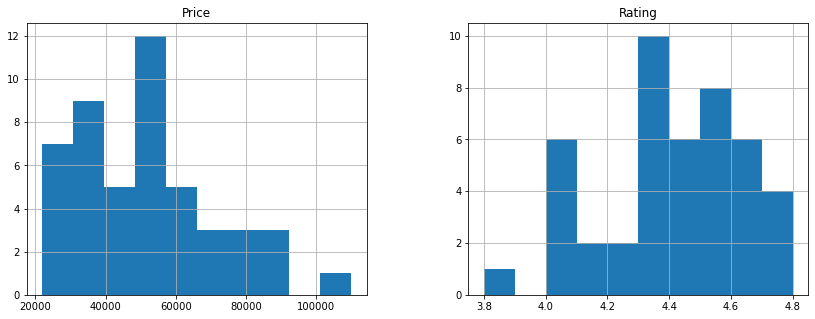

In [65]:
# Plot Histograms of Price and Rating

df.hist(figsize=(14,5))
plt.show()

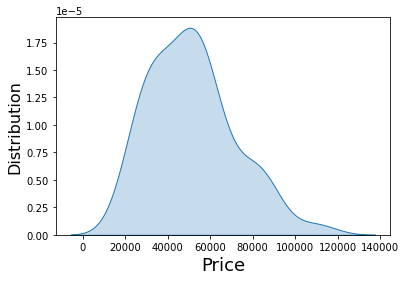

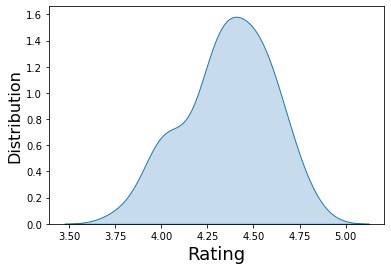

In [66]:
# Plot Distibution Plots of Price and Rating

columns=['Price','Rating']
for i in columns:
    sns.kdeplot(df[i],shade=True)
    plt.xlabel(i, fontsize=18)
    plt.ylabel('Distribution', fontsize=16)
    plt.show()

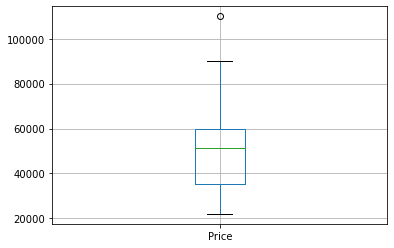

In [68]:
# Boxplot of Price  using Dataframe method

df.boxplot(column='Price',grid=True,figsize=(6,4))
plt.show()

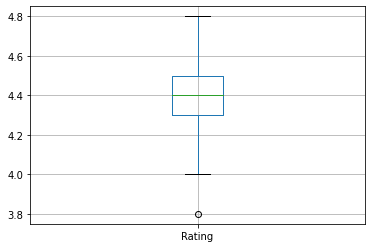

In [69]:
# Box plot of Rating

df.boxplot(column='Rating', grid=True, figsize=(6,4))
plt.show()

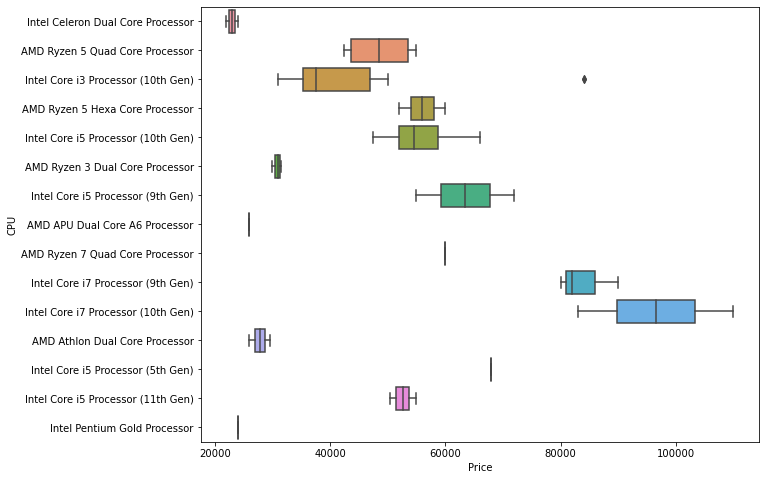

In [70]:
# Bivariate Analysis
# Box plot of CPU and Price

plt.figure(figsize=(10,8))
sns.boxplot(y="CPU",x='Price',data=df)
plt.show()

### Bar Graphs using Matplotlib

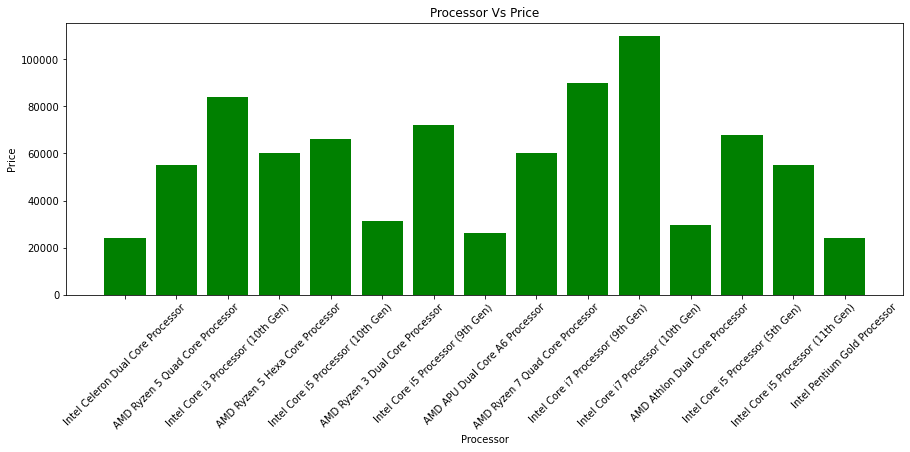

In [76]:
# Bar Graph - Processor Vs Price
#Using plt

plt.figure(figsize=(15,5))
plt.bar(df['CPU'], df['Price'], color='green')
plt.xticks(rotation=45)
plt.xlabel('Processor')
plt.ylabel('Price')
plt.title('Processor Vs Price')
plt.show()

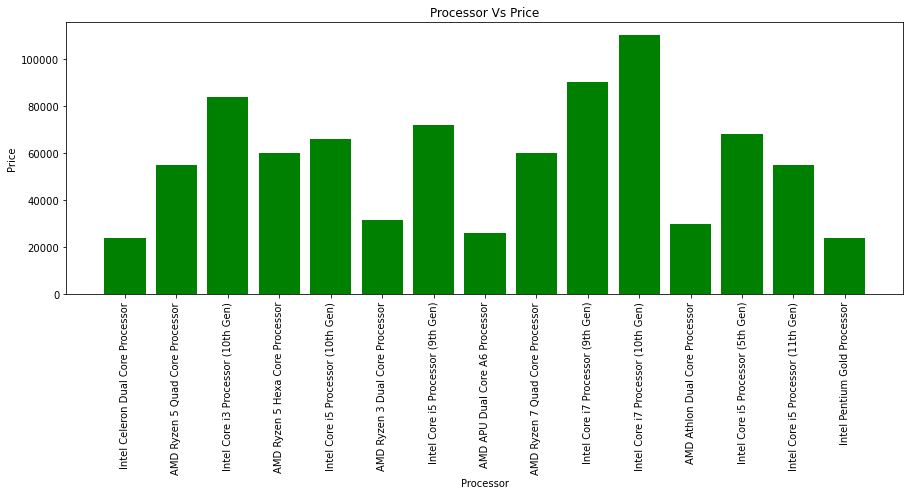

In [77]:
plt.figure(figsize=(15,5))
plt.bar(df['CPU'], df['Price'], color='green')
plt.xticks(rotation=90)
plt.xlabel('Processor')
plt.ylabel('Price')
plt.title('Processor Vs Price')
plt.show()